In [4]:
## math, plotting
import matplotlib.pyplot as plt
import seaborn as sb

import numpy as np
import pandas as pd
import scipy.stats

## machine learning
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression


import pickle

import sys
from os import listdir

import repetition_manuscript_defaults as MDef


import RateMapClass_William_20190308 as RateMapClass
import ratterdam_RepetitionCoreFx as CoreFx
import confounds as direction
import newAlleyBounds as bounds2

68789
68789
68789
68789
68789
68789
68789
68789
68789
68789
68789
53647
53647
53647
53647
53647
53647
53647
53647
56275
56275
56275
56275
56275
56275
56275
56275
56275
53840
53840
53840
53840
53840
53840
53840
53840
59160
59160
59160
59160
59160
59160
59160
59160
59160
64017
64017
64017
64017
64017
64017
64017
64017
64017
64017
72353
72353
72353
72353
72353
72353
72353
72353
72353
72353
72353
72353
79107
79107
79107
79107
79107
79107
79107
79107
79107
79107
79107
79107
79107
52305
52305
52305
52305
52305
52305
52305
52305
76844
76844
76844
76844
76844
76844
76844
76844
76844
76844
76844
76844
76844


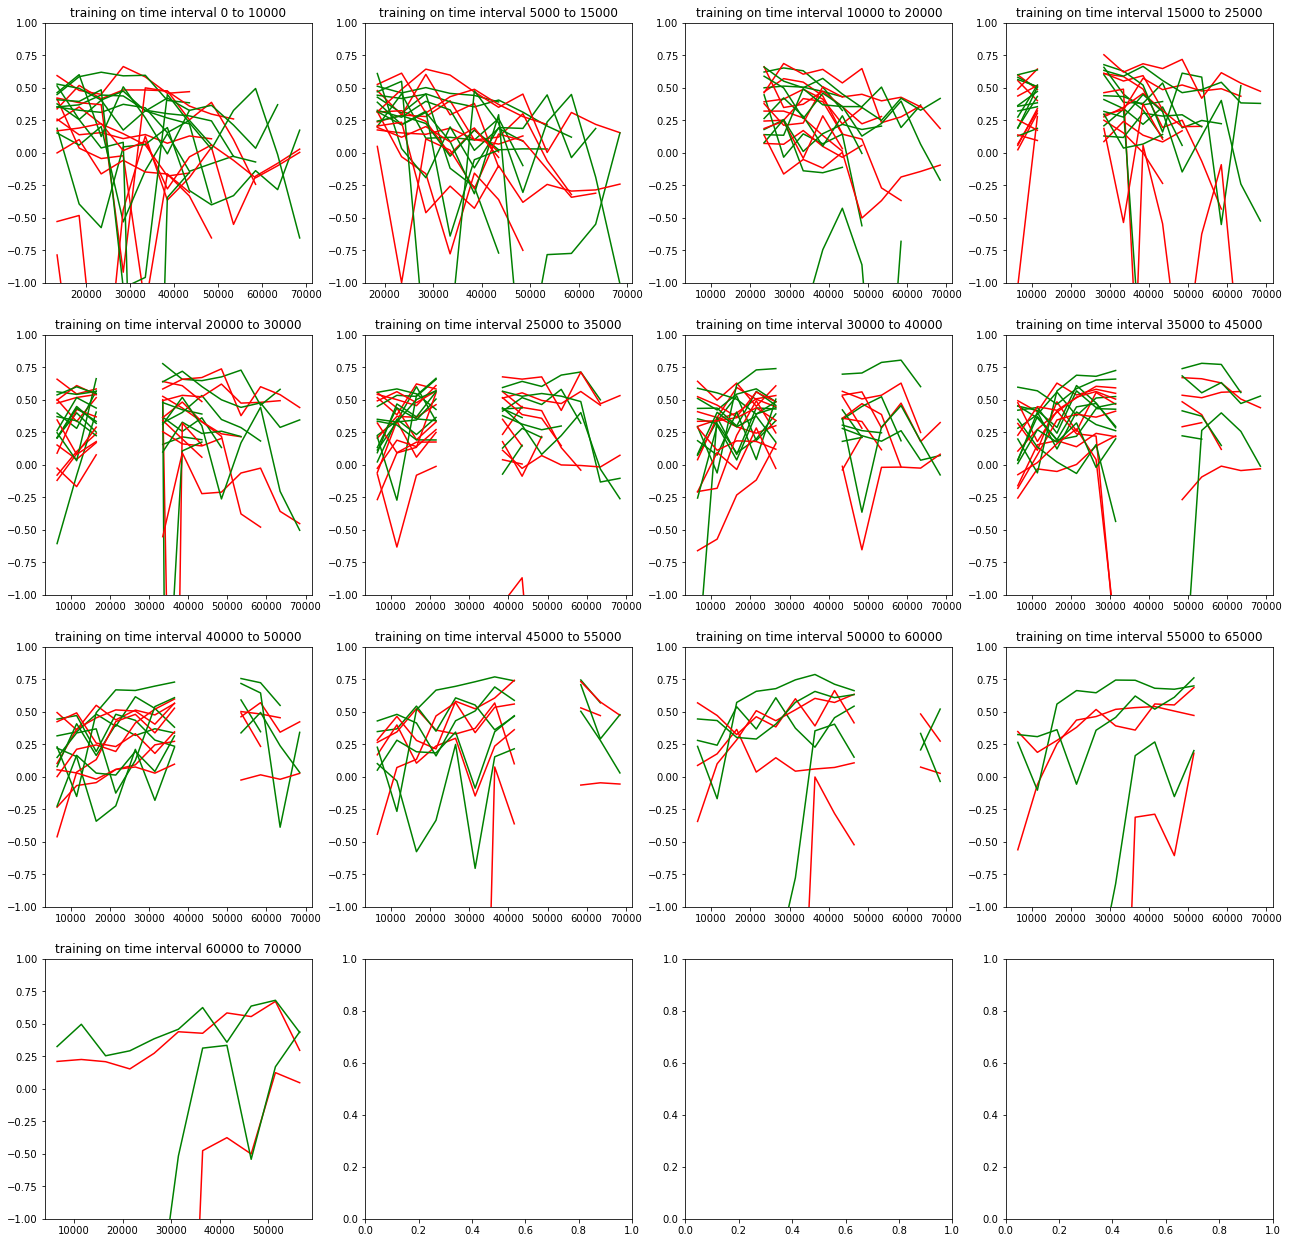

In [2]:

fig, axs = plt.subplots(4,4,figsize=(22,22))

with open("E:\\Ratterdam\\R_data_repetition\\20220405-124315_superPopulationRepetition.pickle","rb") as f:
    alldat = pickle.load(f)   
store_dir = "E:\\UserData\\Documents\\GitHub\\ratterdam\\RatterdamOpen_Project\\repetition_manuscript_code\\figure6\\"

all_time_pos_positive = [ [] for _ in range(13) ]
all_time_pos_negative = [ [] for _ in range(13) ]
pos_corr = []
neg_corr = []
all_rats = list(alldat.keys())
for rat in all_rats:  
    all_days = list(alldat[rat].keys())
    for day in all_days:
        ##print(rat, day)
        
        inst_fr = np.load(store_dir + rat + '_' + day + '_inst_fr.npy')
        x = np.load(store_dir + rat + '_' + day + '_x_within.npy')
        y = np.load(store_dir + rat + '_' + day + '_y_within.npy')
        
        scaler = StandardScaler()
        inst_fr = scaler.fit_transform(inst_fr)

        dt = 5000##10000
        train_size = 10000##16000
        buffer = 1000
        test_size = 5000
        window = 5000

        for i in range(0, int(np.floor((len(inst_fr)-train_size)/dt))):
            print(len(inst_fr))
            ##print('starting',i*dt, i*dt+ train_size)
            all_test_scores= []
            all_test_scores_other = []

            X_train = inst_fr[i*dt: (i)*dt+ train_size]
            y_train1 = x[i*dt: (i)*dt+ train_size]
            y_train2 = y[i*dt: (i)*dt+ train_size]

            model = LinearRegression()
            model.fit(X_train, y_train1)

            model2 = LinearRegression()
            model2.fit(X_train, y_train2)

            start = (i)*dt+ train_size + buffer 
            all_mids = []
            xtest_scores = []
            ytest_scores = []
            while start + window + test_size < len(inst_fr):
                ##print(start, start + test_size)
                xscore = model.score( inst_fr[start: start + test_size],x[start: start + test_size])
                xtest_scores.append(xscore)
                yscore = model2.score(inst_fr[start: start + test_size] ,y[start: start + test_size])
                ytest_scores.append(yscore)
                all_mids.append((start + start + test_size)/2)
                all_time_pos_negative[i].append(np.array([(start + start + test_size)/2, xscore]))
                start = start + window
            
            if len(all_mids)>5:
                neg_corr.append(scipy.stats.spearmanr(all_mids, xtest_scores)[0])

            all_mids_other = []
            start = (i)*dt- buffer-test_size 

            xtest_scores_other = []
            ytest_scores_other = []
            while start >0:
                ##print('early', start, start+test_size)
                xscore = model.score(inst_fr[start: start + test_size],x[start: start + test_size])
                xtest_scores_other.append(xscore)
                yscore = model2.score(inst_fr[start: start + test_size] ,y[start: start + test_size])
                ytest_scores_other.append(yscore)
                all_mids_other.append((start + start + test_size)/2)
                all_time_pos_positive[i].append(np.array([(start + start + test_size)/2, xscore]))
                start = start - window
            if len(all_mids_other)>5:
                ##slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(all_mids_other, xtest_scores_other)
                pos_corr.append(scipy.stats.spearmanr(all_mids_other, xtest_scores_other)[0])
                
            axs[int(np.floor(i/4)),i%4].plot(all_mids, xtest_scores, color = 'red')
            axs[int(np.floor(i/4)),i%4].plot(all_mids, ytest_scores, color = 'green')
            axs[int(np.floor(i/4)),i%4].plot(all_mids_other, xtest_scores_other,color = 'red')
            axs[int(np.floor(i/4)),i%4].plot(all_mids_other, ytest_scores_other,color = 'green')
            axs[int(np.floor(i/4)),i%4].set_ylim(-1, 1)
            axs[int(np.floor(i/4)),i%4].set_title('training on time interval '+ str(i*dt)+ ' to ' + str(i*dt + train_size))




In [8]:
## plotting
%matplotlib qt5
fig, ax = plt.subplots()
boxes = ax.boxplot([pos_corr, neg_corr], whis = [5,95],
                                patch_artist=True,
                                notch=True
                                
                                )
for patch in boxes['boxes']:
    patch.set_facecolor('gray')
    patch.set_edgecolor('black')
    patch.set_linewidth(2)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='both', labelsize=MDef.ticksize)
ax.set_xticklabels(['left side', 'right side'], fontsize=MDef.ticksize)
ax.set_ylabel('spearman correlation', fontsize=MDef.ticksize)
plt.show()

In [10]:
## statistics
## are the two correlations different?
print(np.median(pos_corr))
print(np.median(neg_corr))

print(scipy.stats.mannwhitneyu(pos_corr, neg_corr))
print(scipy.stats.ttest_ind(pos_corr, neg_corr))

## is the left side correlation greater than 0?
print(scipy.stats.ttest_1samp(pos_corr, 0, alternative='greater'))
## we can reject the null
## conclude left side correlation is positive 

## is the population correlation left less than 0?
print(scipy.stats.ttest_1samp(neg_corr, 0, alternative='less'))
## we can reject the null
## conclude right side correlation is negative

0.7714285714285715
-0.6
MannwhitneyuResult(statistic=72.5, pvalue=7.891700317989552e-11)
Ttest_indResult(statistic=10.524450077895336, pvalue=4.570584352680635e-16)
Ttest_1sampResult(statistic=6.894856978000847, pvalue=5.898957300985031e-08)
Ttest_1sampResult(statistic=-7.9722305317891875, pvalue=4.310615238461223e-10)
